In [156]:
%matplotlib inline
from matplotlib.pyplot import figure, imshow, axis
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from math import log10
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from IPython.display import display, Markdown, HTML

** Require RDKit 2018.09.01 or later **

In [193]:
import rdkit
rdkit.__version__

'2018.09.1'

In [176]:
#sdf_file = "CHEMBL1827733_5HT2A.sdf"
sdf_file = "CHEMBL930273_GSK3.sdf"
#sdf_file = "CHEMBL952131_EGFR.sdf"

In [177]:
def sdf_to_desc(sdf_file):
    fps = []
    targets = []
    nfps = []
    mols=[]
    bis = []

    for mol in Chem.SDMolSupplier(sdf_file):
        mols.append(mol)
        bi = {}
        fps.append(AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, bitInfo=bi))  # fingerprint
        targets.append(9.0 - log10(float(mol.GetProp("ACTIVITY"))))  # pIC50
        bis.append(bi)

    for fp in fps:
        nfp = np.zeros((1,))
        DataStructs.ConvertToNumpyArray(fp, nfp)
        nfps.append(nfp)

    return (np.array(nfps), np.array(targets), mols, bis)

### Random Forest Regression Analysis

In [178]:
def rf(x_train, x_test, y_train, y_test):
    r = RandomForestRegressor().fit(x_train, y_train)
    y_pred = r.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    print(' RF: R2: {0:f}, RMSE:{1:f}'.format(r2, rmse))
    return r

In [179]:
x, y, mols,bis = sdf_to_desc(sdf_file)

In [185]:
x_train, x_test, y_train, y_test, mols_train, mols_test, bis_train, bis_test = train_test_split(x, y, mols, bis, test_size=0.1)

In [186]:
r = rf(x_train, x_test, y_train, y_test)

 RF: R2: 0.481589, RMSE:0.802244


### Sorting bit positions by feature importances

In [187]:
sorted_pos = sorted(zip(range(r.feature_importances_.shape[0]), r.feature_importances_), key=lambda x: x[1], reverse=True)

In [188]:
important_posisions = [t[0] for t in sorted_pos[:20]]

### Visualizing important fragments

## Test molecule #1<h2>

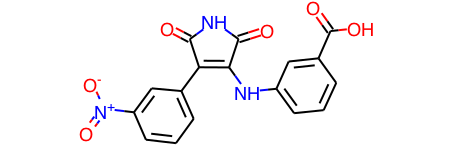

#### Important fragments

Bit position: 1152


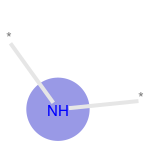

Bit position: 155


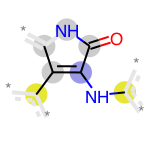

Bit position: 650


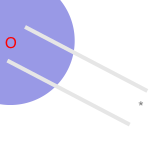

## Test molecule #2<h2>

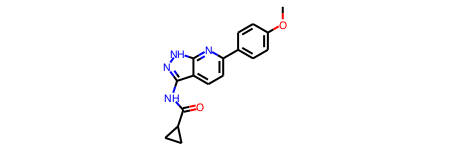

#### Important fragments

Bit position: 328


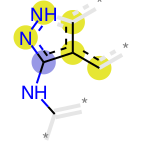

Bit position: 926


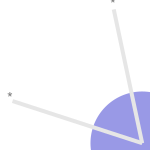

Bit position: 591


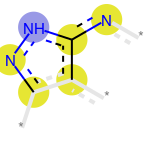

Bit position: 1490


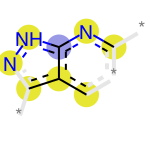

Bit position: 1816


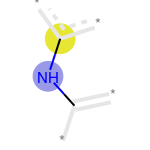

Bit position: 1152


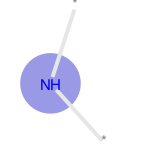

Bit position: 898


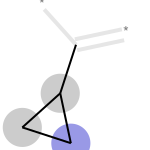

Bit position: 650


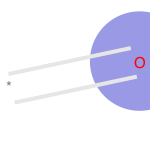

Bit position: 896


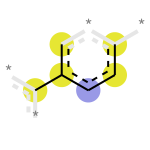

Bit position: 980


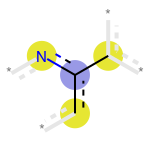

## Test molecule #3<h2>

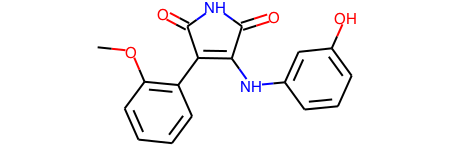

#### Important fragments

Bit position: 1602


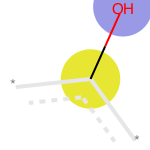

Bit position: 1152


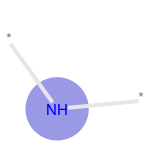

Bit position: 155


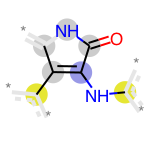

Bit position: 650


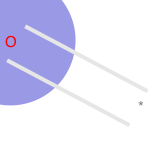

## Test molecule #4<h2>

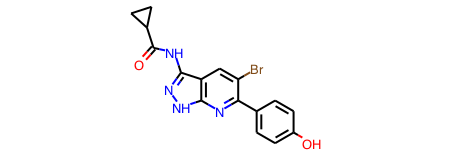

#### Important fragments

Bit position: 328


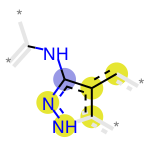

Bit position: 1602


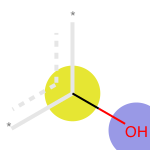

Bit position: 926


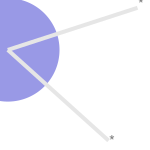

Bit position: 591


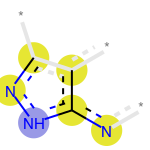

Bit position: 1313


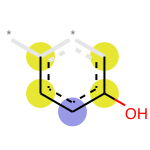

Bit position: 1490


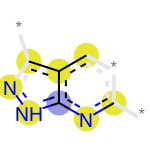

Bit position: 786


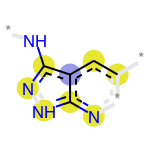

Bit position: 1816


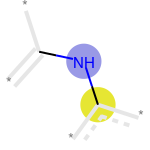

Bit position: 1152


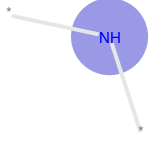

Bit position: 898


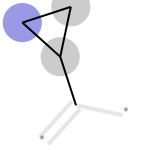

Bit position: 650


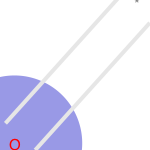

Bit position: 1121


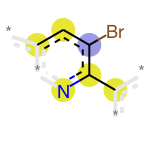

Bit position: 896


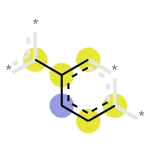

## Test molecule #5<h2>

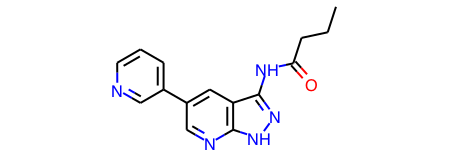

#### Important fragments

Bit position: 328


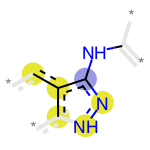

Bit position: 591


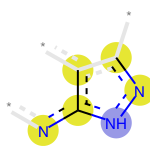

Bit position: 1452


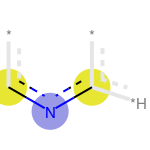

Bit position: 786


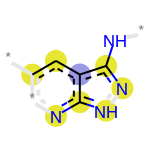

Bit position: 1816


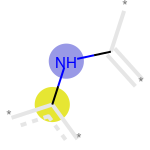

Bit position: 1152


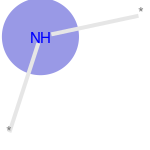

Bit position: 1535


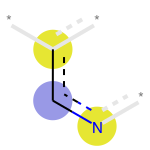

Bit position: 650


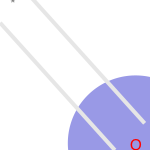

## Test molecule #6<h2>

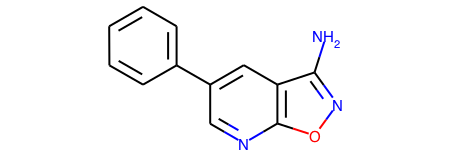

#### Important fragments

Bit position: 1452


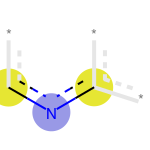

Bit position: 1535


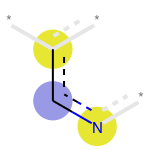

## Test molecule #7<h2>

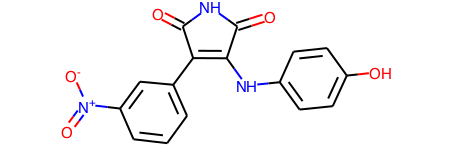

#### Important fragments

Bit position: 1602


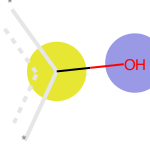

Bit position: 1313


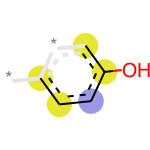

Bit position: 1152


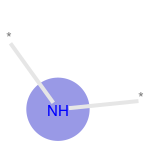

Bit position: 155


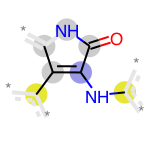

Bit position: 650


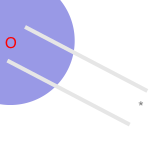

## Test molecule #8<h2>

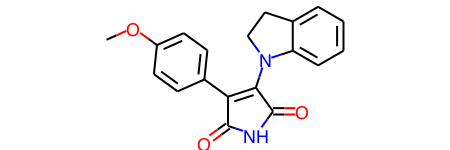

#### Important fragments

Bit position: 926


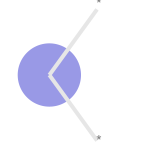

Bit position: 650


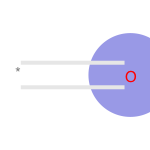

Bit position: 896


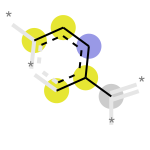

## Test molecule #9<h2>

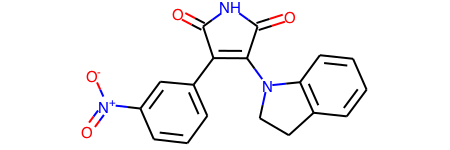

#### Important fragments

Bit position: 926


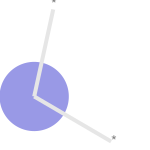

Bit position: 650


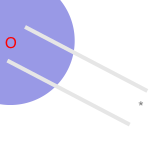

## Test molecule #10<h2>

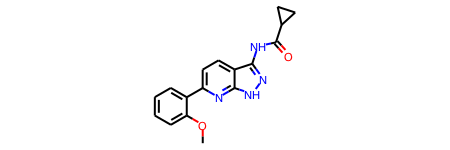

#### Important fragments

Bit position: 328


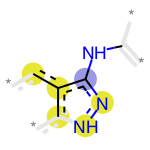

Bit position: 926


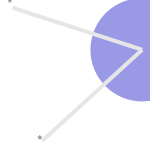

Bit position: 591


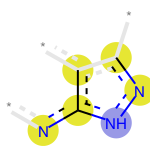

Bit position: 1490


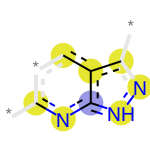

Bit position: 1816


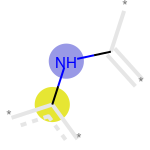

Bit position: 1152


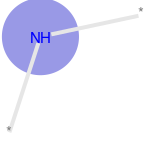

Bit position: 898


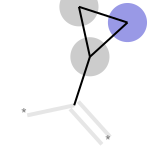

Bit position: 650


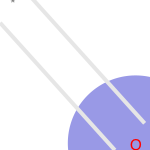

Bit position: 980


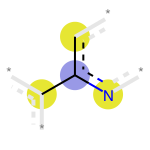

## Test molecule #11<h2>

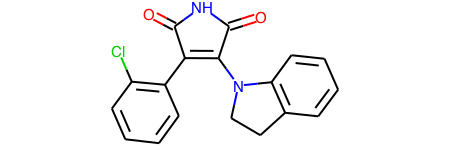

#### Important fragments

Bit position: 926


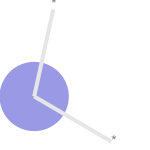

Bit position: 366


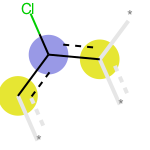

Bit position: 650


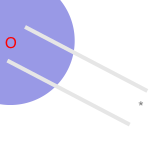

## Test molecule #12<h2>

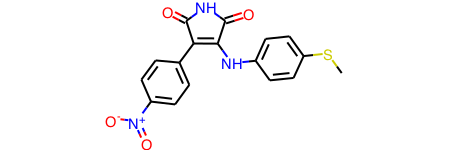

#### Important fragments

Bit position: 1152


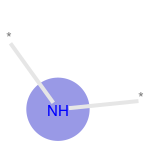

Bit position: 155


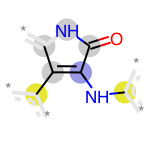

Bit position: 650


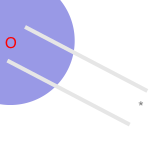

Bit position: 896


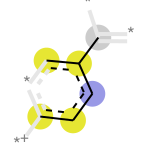

## Test molecule #13<h2>

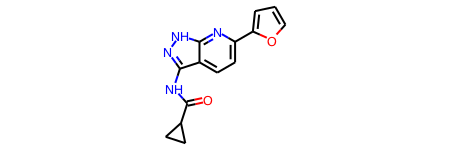

#### Important fragments

Bit position: 328


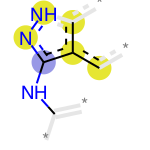

Bit position: 926


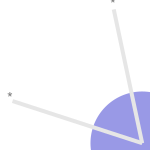

Bit position: 591


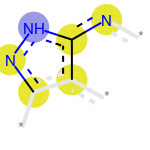

Bit position: 1490


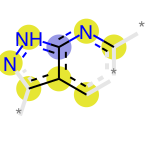

Bit position: 1816


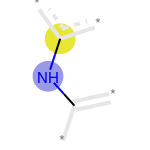

Bit position: 1152


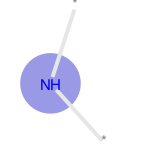

Bit position: 898


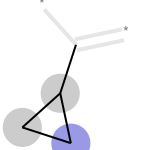

Bit position: 650


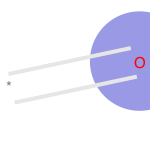

Bit position: 980


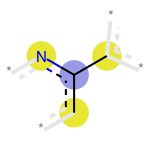

## Test molecule #14<h2>

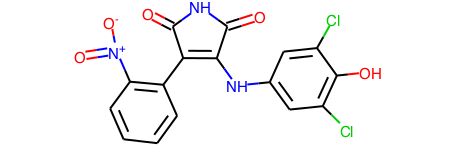

#### Important fragments

Bit position: 1602


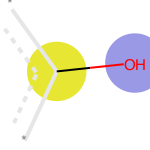

Bit position: 366


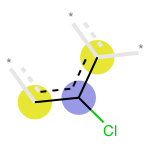

Bit position: 1152


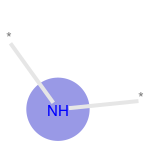

Bit position: 155


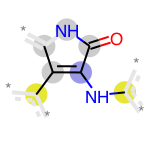

Bit position: 650


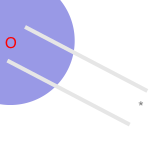

## Test molecule #15<h2>

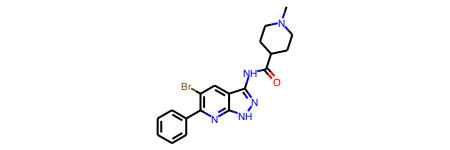

#### Important fragments

Bit position: 328


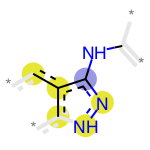

Bit position: 926


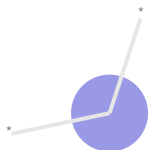

Bit position: 591


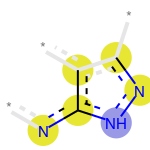

Bit position: 1490


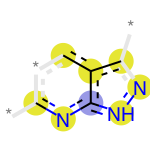

Bit position: 786


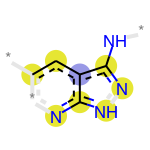

Bit position: 1816


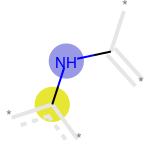

Bit position: 1152


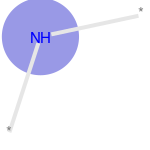

Bit position: 650


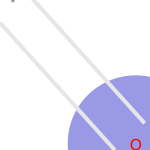

Bit position: 1121


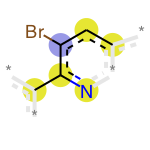

## Test molecule #16<h2>

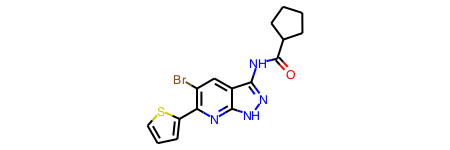

#### Important fragments

Bit position: 328


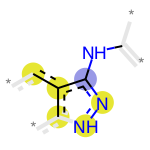

Bit position: 926


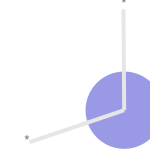

Bit position: 591


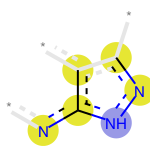

Bit position: 1490


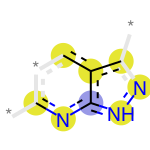

Bit position: 786


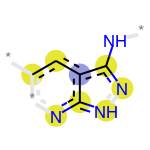

Bit position: 1816


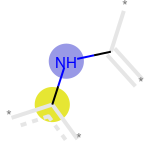

Bit position: 1152


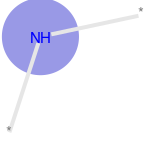

Bit position: 650


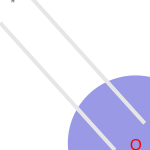

Bit position: 1121


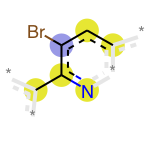

In [189]:
i = 0
for bi, mol in zip(bis_test, mols_test):
    i += 1
    display(Markdown("## Test molecule #{}<h2>".format(i)))
    display(mol)
    display(Markdown("#### Important fragments"))
    frgs = []
    for pos in important_posisions:
        if bi.get(pos, False):
            print("Bit position: {}".format(pos))
            display(Draw.DrawMorganBit(mol,pos,bi))
